In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display as disp
from statannot import add_stat_annotation
from itertools import product
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [ ]:
fdir = "data/data_processed/stat_results"

cor_int_f = 'Correct~Interest'
uns_int_f = 'Unsure~Interest'

cor_rel_f = 'Correct~Reliable.source'
uns_rel_f = 'Unsure~Reliable.source'
fs = [cor_int_f, uns_int_f, cor_rel_f, uns_rel_f]

prefix = "GR-Question"
gr_ed = f'{prefix}-Education'
gr_spec = f'{prefix}-Specialization'
# gr_ed_spec = f'{prefix}-Education-Specialization'
grs = [gr_ed, gr_spec, gr_ed_spec]

for f in fs:
    for gr in grs:
        fname = f"{fdir}/{f}_{gr}@OUTLIERS_REMOVED@1.1.csv"
        df = pd.read_csv(fname).query("`p.adj.signif` != 'ns' and n1 > 20 and n2 > 20")
        columns = df.columns[:3] if df.columns[3] == '.y.' else df.columns[:2]
        columns = columns.to_list()
        columns += ['group1', 'group2', 'n1', 'n2', 'p.adj']
        df = df[columns]
        if len(df) > 0:
            print(f'{f}  {gr}')
            disp(df)

In [92]:
df_all = pd.read_csv("data/data_processed/NEUROMYTHS_ALL_LABELS@1.1.csv")
df_all = pd.read_csv("data/data_processed/stat_results/Correct~Gender_GR-Question-Specialization@OUTLIERS_REMOVED@1.1.csv")
df_all.head()
# df_all['Specialization'].unique().tolist()

,Specialization,Question,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups
0,C&B,Facts,Correct,Female,Male,129,42,2381.5,0.23700,0.78000,ns,1.09,"c(""Female"", ""Male"")"
1,P&M&IT,Facts,Correct,Female,Male,81,104,4202.5,0.98000,0.98000,ns,1.09,"c(""Female"", ""Male"")"
2,Pedagogy,Facts,Correct,Female,Male,317,64,8152.5,0.01280,0.08960,ns,1.09,"c(""Female"", ""Male"")"
3,Psychology,Facts,Correct,Female,Male,195,22,1414.0,0.00856,0.06848,ns,1.09,"c(""Female"", ""Male"")"
4,C&B,Myths,Correct,Female,Male,129,42,2349.0,0.19500,0.78000,ns,0.89,"c(""Female"", ""Male"")"


In [98]:
# temp: pd.Series = df_all\
#     .query("Education == 'Intermediate' and Specialization == 'Pedagogy'")\
#     .apply(pd.unique)\
#     .apply(lambda x: x[0] if len(x) == 1 else None) \
#     .dropna()
#
# temp.to_dict()
df = df_all.query('`Question` == "Facts"')
dup_cols = df.apply(pd.unique) \
    .apply(lambda x: x[0] if len(x) == 1 else None) \
    .dropna()\
    .index\
    .to_list()
cut = df.columns.to_list().index('.y.')
columns_id = df.columns[:cut].to_list()
columns_id = [i for i in columns_id if i not in dup_cols]
columns = columns_id + ['group1', 'group2', 'p.adj']
df: pd.DataFrame = df[columns].set_index(columns_id)
df.values.tolist()
df.index

[['Female', 'Male', 0.78],
 ['Female', 'Male', 0.98],
 ['Female', 'Male', 0.0896],
 ['Female', 'Male', 0.06848]]

```python
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("Sun", "Thur"), ("Sun", "Sat"), ("Fri", "Sun")],
                    perform_stat_test=False, pvalues=[0.1, 0.1, 0.001],
                    test=None, text_format='star', loc='inside', verbose=2);

x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
]
ax = sns.boxplot(data=df, x=x, y=y, hue=hue,)
add_stat_annotation(ax, data=df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')
```

,Question,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups
0,Facts,Unsure,No,Yes,731,223,94402,0.000309,0.000618,***,0.8325,"c(""No"", ""Yes"")"
1,Myths,Unsure,No,Yes,731,223,94210,0.000394,0.000618,***,0.9125,"c(""No"", ""Yes"")"


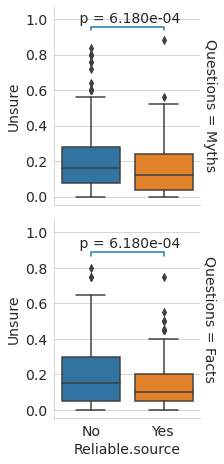

In [9]:
def read_stat(fname: str) -> pd.DataFrame:
    df = pd.read_csv(fname).query("`p.adj.signif` != 'ns' and n1 > 20 and n2 > 20")
    # cut = df.columns.to_list().index('.y.')
    # columns = df.columns[:cut].to_list()
    # columns += ['group1', 'group2', 'n1', 'n2', 'p.adj']
    # df = df[columns]
    return df

def extract_pairs_pvals(data: pd.DataFrame, dup_cols) -> dict:
    # dup_cols = data.apply(pd.unique) \
    #     .apply(lambda x: x[0] if len(x) == 1 else None) \
    #     .dropna() \
    #     .index \
    #     .to_list()
    cut = data.columns.to_list().index('.y.')
    columns_id = data.columns[:cut].to_list()
    columns_id = [i for i in columns_id if i not in dup_cols]
    columns = columns_id + ['group1', 'group2', 'p.adj']
    try:
        new_data: pd.DataFrame = data[columns].set_index(columns_id)
        vals = list(zip(new_data.index, new_data.values.tolist()))
    except ValueError:
        vals = list(data[['group1', 'group2', 'p.adj']].values.tolist())
    return vals

def extract_label_query(data: pd.DataFrame) -> str:
    temp = data.apply(pd.unique) \
        .apply(lambda x: x[0] if len(x) == 1 else None)\
        .dropna()\
        .to_dict()
    query_str = ''
    for k, v in temp.items():
        query_str += f"`{k}` == '{v}' and"
    query_str = query_str[:-3] if len(query_str) > 0 else query_str
    return query_str

def annot(data, **kws):
    ax = plt.gca()
    fname = kws['fname']
    stat = read_stat(fname)
    query_str = extract_label_query(data)
    stat = stat.query(query_str)
    if len(stat) == 0:
        return
    dup_cols = [kws.get('col'), kws.get('row')]
    stat = extract_pairs_pvals(stat, dup_cols)
    if len(stat[0]) == 2:
        box_pairs = [((i[1][0], i[0]), (i[1][1], i[0])) for i in stat]
        pvals = [v[1][-1] for v in stat]
    else:
        box_pairs = [(i[0], i[1]) for i in stat]
        pvals = [v[-1] for v in stat]

    if kws.get('hue') is not None and kws.get('hue_order') is None:
        kws['hue_order'] = data[kws['hue']].unique().tolist()
        # box_pairs = list(product(box_pairs, kws['hue_order']))
    # elif kws.get('hue') is not None:
    #     box_pairs = list(product(box_pairs, kws['hue_order']))

    default_params = {
        'perform_stat_test': False,
        'pvalues': pvals,
        'test': None,
        'text_format': 'full',
        'loc': 'inside',
        'verbose': 0,
        'box_pairs': box_pairs
    }
    default_params.update(kws)
    del_params = ['row', 'dodge', 'kind', 'fname', 'col', 'height', 'aspect', 'margin_titles']
    for del_param in del_params:
        try:
            default_params.pop(del_param)
        except KeyError:
            pass
    add_stat_annotation(ax, data=data, **default_params);



df_all = pd.read_csv("data/data_processed/NEUROMYTHS_ALL_LABELS@1.1.csv")

font = {
    'pdf.fonttype': 42,
    "text.usetex": False,
    'font.family' : 'normal',
    # 'weight' : 'normal',
    'font.size'   : 14,
    # 'figure.figsize': (11.7,8.27)
}

plt.rcParams.update(font)
# sns.set(rc={'figure.figsize':(11.7,8.27)})
denom = 1.5
height = 5/denom
width = 5/denom
params = {
    "x":'Reliable.source',
    "y":'Unsure',
    # "col":'Specialization',
    # 'hue':'Education',
    # "col":'Specialization',
    "row": 'Question',
    "data":df_all,
    "kind":'box',
    "dodge":0.02,
    'height': height,
    'aspect': width/height,
    'margin_titles': True,
}
# fig = plt.figure(figsize=(11.7/denom, 8.27/denom))

g: sns.axisgrid.FacetGrid = sns.catplot(**params)
[plt.setp(ax.get_xticklabels(), size=14) for ax in g.axes.flat]

fdir = "data/data_processed/stat_results"
f= f'{params["y"]}~{params["x"]}'
prefix = "GR-Question"
gr= f'{prefix}'
fname = f"{fdir}/{f}_{gr}@OUTLIERS_REMOVED@1.1.csv"

params['fname'] = fname
g.map_dataframe(annot, **params)
g.set_titles(col_template="{col_name}", row_template="Questions = {row_name}")
df = pd.read_csv(fname)
# disp(read_stat(fname))
disp(df)
g.savefig(f'plots/{f}_{gr}@OUTLIERS_REMOVED@1.1.pdf')

In [21]:
fdir = "data/data_processed/stat_results"
f= f'Correct~Reliable.source'
prefix = "GR-Question"
gr= f'{prefix}-Education-Specialization'
fname = f"{fdir}/{f}_{gr}@OUTLIERS_REMOVED@1.1.csv"
pd.read_csv(fname)

,Education,Specialization,Question,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,y.position,groups
0,Intermediate,C&B,Facts,Correct,No,Yes,89,33,1381.0,0.6130,1.0000,ns,1.11,"c(""No"", ""Yes"")"
1,Intermediate,P&M&IT,Facts,Correct,No,Yes,61,22,484.5,0.0534,0.8010,ns,1.11,"c(""No"", ""Yes"")"
2,Intermediate,Pedagogy,Facts,Correct,No,Yes,158,32,2071.0,0.1060,1.0000,ns,1.11,"c(""No"", ""Yes"")"
3,Intermediate,Psychology,Facts,Correct,No,Yes,105,24,1061.5,0.2280,1.0000,ns,1.11,"c(""No"", ""Yes"")"
4,Senior,C&B,Facts,Correct,No,Yes,35,14,231.0,0.7630,1.0000,ns,1.01,"c(""No"", ""Yes"")"
5,Senior,P&M&IT,Facts,Correct,No,Yes,66,36,973.5,0.1320,1.0000,ns,1.11,"c(""No"", ""Yes"")"
6,Senior,Pedagogy,Facts,Correct,No,Yes,148,43,2749.0,0.1730,1.0000,ns,1.11,"c(""No"", ""Yes"")"
7,Senior,Psychology,Facts,Correct,No,Yes,69,19,571.5,0.3940,1.0000,ns,1.11,"c(""No"", ""Yes"")"
8,Intermediate,C&B,Myths,Correct,No,Yes,89,33,1279.5,0.2750,1.0000,ns,0.87,"c(""No"", ""Yes"")"
9,Intermediate,P&M&IT,Myths,Correct,No,Yes,61,22,740.0,0.4770,1.0000,ns,0.83,"c(""No"", ""Yes"")"


In [120]:
fname

'data/data_processed/stat_results/Correct~Specialization_GR-Question-Education@OUTLIERS_REMOVED@1.1.csv'